## PROBLEMA DEL VENDEDOR VIAJERO (TSP)
#### Suponga que $n$ ciudades están interconectadas por carreteras, con distancias conocidas. Un vendedor desea partir de su ciudad de origen (p.ej. Bogota), recorrer una vez todas las ciudades, pasando por cada una sólo una vez y minimizando la distancia total recorrida. ¿Qué recorrido debería hacer?

<img src="ProblemaViajero2.png" width="400" height="200" align="left">

#### Cuántas posibles soluciones hay para $n$ ciudades?
$ n! $

Text(0, 0.5, 'Numero de posibles soluciones del TSP')

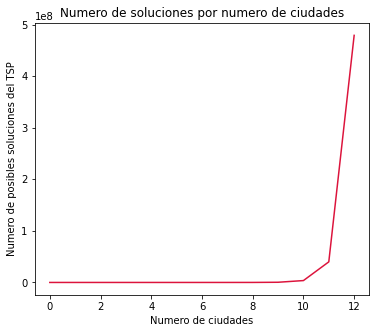

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

n = np.arange(13,dtype=int)

def fact(x):
    return math.factorial(x)

vfunc = np.vectorize(fact)
n_sols= vfunc(n)

fig,ax=plt.subplots(figsize=(6,5))
ax.plot(n,n_sols,c='crimson',lw=1.5)
ax.set_title('Numero de soluciones por numero de ciudades')
ax.set_xlabel('Numero de ciudades')
ax.set_ylabel('Numero de posibles soluciones del TSP')

### A continuación consumimos la API de google maps para obtener la distancia en carretera entre 10 ciudades de Colombia. La URL con el request tiene la forma: https://maps.googleapis.com/maps/api/distancematrix/Formato?Parameters&key=ClavePersonal

- Formato: Google ofrece devolver en json o en xml. Cualquiera es fácilmente parsable con Jsonpath o Xpath.
- Parameters: Se debe especificar origen y destino como mínimo. Hay algunos otros opcionales. 
- key: Se requiere generar clave para acceder el endpoint. Debajo borré la mía, por favor generar propias. 

In [56]:
import requests as rq
response = rq.get("https://maps.googleapis.com/maps/api/distancematrix/json?destinations=bogota|medellin|cali|bucaramanga|cartagena|barranquilla|yopal|villavicencio|riohacha|santa marta&origins=bogota|medellin|cali|bucaramanga|cartagena|barranquilla|yopal|villavicencio|riohacha|santa marta&key=MyKey")

In [57]:
resp=response.json()

In [58]:
resp

{'destination_addresses': ['Bogotá, Bogota, Colombia',
  'Medellín, Medellin, Antioquia, Colombia',
  'Cali, Valle del Cauca, Colombia',
  'Bucaramanga, Santander, Colombia',
  'Cartagena, Cartagena Province, Bolivar, Colombia',
  'Barranquilla, Atlantico, Colombia',
  'Yopal, Casanare, Colombia',
  'Villavicencio, Meta, Colombia',
  'Riohacha, La Guajira, Colombia',
  'Santa Marta, Magdalena, Colombia'],
 'origin_addresses': ['Bogotá, Bogota, Colombia',
  'Medellín, Medellin, Antioquia, Colombia',
  'Cali, Valle del Cauca, Colombia',
  'Bucaramanga, Santander, Colombia',
  'Cartagena, Cartagena Province, Bolivar, Colombia',
  'Barranquilla, Atlantico, Colombia',
  'Yopal, Casanare, Colombia',
  'Villavicencio, Meta, Colombia',
  'Riohacha, La Guajira, Colombia',
  'Santa Marta, Magdalena, Colombia'],
 'rows': [{'elements': [{'distance': {'text': '1 m', 'value': 0},
     'duration': {'text': '1 min', 'value': 0},
     'status': 'OK'},
    {'distance': {'text': '416 km', 'value': 415613

### A continuación convertimos el Json aun dataframe con la información que nos interesa para tener una vista clara de la información. Luego, lo llevamos a un dict para ser usado en el algoritmo genético. 

In [106]:
import jsonpath_ng as jp
import pandas as pd
import re

In [115]:
df = pd.DataFrame()
for i in range(len(resp['destination_addresses'])):
    jpathstring = '$.rows['+str(i)+'].elements[:].distance.text'
    jp_expr = jp.parse(jpathstring)
    list_val = [match.value for match in jp_expr.find(resp)]
    list_dist = [x[0] for x in [z.split(' ') for z in list_val]]
    list_dist = [int(re.sub(r'[^\w\s]', '', x)) for x in list_dist]
    df[resp['destination_addresses'][i]] = list_dist

In [116]:
df

,"Bogotá, Bogota, Colombia","Medellín, Medellin, Antioquia, Colombia","Cali, Valle del Cauca, Colombia","Bucaramanga, Santander, Colombia","Cartagena, Cartagena Province, Bolivar, Colombia","Barranquilla, Atlantico, Colombia","Yopal, Casanare, Colombia","Villavicencio, Meta, Colombia","Riohacha, La Guajira, Colombia","Santa Marta, Magdalena, Colombia"
0,1,415,453,424,1037,1000,317,339,1009,954
1,416,1,413,382,640,706,610,743,882,826
2,461,409,1,762,1046,1112,778,800,1262,1206
3,426,381,767,1,622,585,481,634,594,539
4,1038,631,1040,623,1,120,1098,1250,390,225
5,1000,705,1114,585,119,1,1059,1212,268,103
6,318,616,770,487,1102,1065,1,252,1074,1019
7,124,531,542,546,1153,1116,251,1,1125,1070
8,1010,882,1268,595,390,268,1069,1222,1,172
9,954,826,1212,539,226,104,1013,1166,172,1


In [117]:
lista_ciudades=['bogota','medellin','cali','bucaramanga','cartagena','barranquilla','yopal','villavicencio','riohacha','santa marta']
df.columns=lista_ciudades
df['ciudades']=lista_ciudades
df=df.set_index('ciudades')
df.to_dict()

{'bogota': {'bogota': 1,
  'medellin': 416,
  'cali': 461,
  'bucaramanga': 426,
  'cartagena': 1038,
  'barranquilla': 1000,
  'yopal': 318,
  'villavicencio': 124,
  'riohacha': 1010,
  'santa marta': 954},
 'medellin': {'bogota': 415,
  'medellin': 1,
  'cali': 409,
  'bucaramanga': 381,
  'cartagena': 631,
  'barranquilla': 705,
  'yopal': 616,
  'villavicencio': 531,
  'riohacha': 882,
  'santa marta': 826},
 'cali': {'bogota': 453,
  'medellin': 413,
  'cali': 1,
  'bucaramanga': 767,
  'cartagena': 1040,
  'barranquilla': 1114,
  'yopal': 770,
  'villavicencio': 542,
  'riohacha': 1268,
  'santa marta': 1212},
 'bucaramanga': {'bogota': 424,
  'medellin': 382,
  'cali': 762,
  'bucaramanga': 1,
  'cartagena': 623,
  'barranquilla': 585,
  'yopal': 487,
  'villavicencio': 546,
  'riohacha': 595,
  'santa marta': 539},
 'cartagena': {'bogota': 1037,
  'medellin': 640,
  'cali': 1046,
  'bucaramanga': 622,
  'cartagena': 1,
  'barranquilla': 119,
  'yopal': 1102,
  'villavicencio':

In [120]:
dict1 = df.to_dict()


### Los algoritmos genéticos son métodos de búsqueda con metaheurística inspirada en el proceso de selección natural y evolución: "Los mejores permanecen y los peores se eliminan".
- Gen: Secuencia de ciudades visitadas desde la inicial hasta retornar a la inicial, pasando por todas una vez. 
- Cromosoma en el Gen: Cada ciudad. 
- Población: Conjunto de posibles soluciones (de genes). 
- Evaluación de la adaptabilidad: Es mejor un gen que sume menos recorrido que uno que sume más recorrido. 
- Selección: Se hace con base en la adaptabilidad de cada gen. 
- Cruce: Se hace cruzando los cromosomas de los padres de manera aleatoria. 
- Mutación: Con una probabilidad dada, se genera un mutante a partir de la mezcla de todo el gen de forma aleatoria. 
- Eliminación: Se elimina en cada generacióna los 2 peores genes. 

In [276]:
def genetico(lista_ciudades, ciudad_inicial, dict_distancias, tam_poblacion=100, generaciones=500, prob_mutacion=0.1):
    import random
    poblacion=iniciar_poblacion(ciudad_inicial,lista_ciudades, tam_poblacion)
    generacion=0
    while generacion<generaciones:
        for i in range(int(tam_poblacion/2)):
            gen1, gen2 = seleccionar(poblacion,dict_distancias)
            ngen1, ngen2 = cruzar(gen1,gen2)
            ngen1 = mutar(prob_mutacion, ngen1)
            ngen2 = mutar(prob_mutacion, ngen2)
            poblacion.append(ngen1)
            poblacion.append(ngen2)
            poblacion = eliminar_peores(poblacion, dict_distancias) 
        generacion+=1
    mejor = mejor_gen(poblacion, dict_distancias)
    return mejor
            

def iniciar_poblacion(ciudad_inicial,lista_ciudades, tam_poblacion):
    import random
    poblacion=[]
    for i in range(tam_poblacion):
        gen = lista_ciudades.copy()
        gen.remove(ciudad_inicial)
        random.shuffle(gen)
        gen.insert(0,ciudad_inicial)        
        gen.append(ciudad_inicial)
        poblacion.append(gen)
    return poblacion
    
def evaluar_adaptabilidad(poblacion, dict_distancias):
    adaptaciones=[(lambda x: sumar_recorrido(x, dict_distancias))(x) for x in poblacion]
    return adaptaciones

def sumar_recorrido(x, dict_distancias):
    suma = 0
    for j,ciudad in enumerate(x):
        if not j==0:
            suma=suma + dict_distancias[x[j-1]][ciudad]
    return 100000/suma
    
def seleccionar(poblacion, dict_distancias):
    adaptacion = evaluar_adaptabilidad(poblacion, dict_distancias)
    total_puntaje = sum(adaptacion)
    val1 = random.randint(0,int(total_puntaje))
    val2 = random.randint(0,int(total_puntaje))
    sum_sel = 0
    for i in range(len(adaptacion)):
        sum_sel = sum_sel+adaptacion[i]
        if sum_sel>=val1:
            gen1 = poblacion[i]
            break
    sum_sel = 0
    for i in range(len(adaptacion)):
        sum_sel = sum_sel+adaptacion[i]
        if sum_sel>=val2:
            gen2 = poblacion[i]
            break
    return gen1, gen2
    

def cruzar(gen1,gen2):
    ngen1 = []
    ngen2 = []
    for i in range(len(gen1)):
        if not gen1[i] in ngen1:
            ngen1.append(gen1[i])
        if not gen2[i] in ngen1:
            ngen1.append(gen2[i])
    for i in range(len(gen1)):
        if not gen2[i] in ngen2:
            ngen2.append(gen2[i])
        if not gen1[i] in ngen2:
            ngen2.append(gen1[i])            
    ngen1.append(ngen1[0])
    ngen2.append(ngen2[0])
    return ngen1, ngen2


def mutar(prob, gen):
    import random
    if random.random()<prob:
        gen_interno = gen[1:-1].copy()
        random.shuffle(gen_interno)
        gen[1:-1] = gen_interno    
    return gen


def eliminar_peores(poblacion, dict_distancias):
    adaptacion = evaluar_adaptabilidad(poblacion, dict_distancias)
    population = poblacion
    for k in range(2):
        i=adaptacion.index(min(adaptacion))
        del population[i]
        del adaptacion[i]
    return population
        
def mejor_gen(poblacion, dict_distancias):
    adaptacion = evaluar_adaptabilidad(poblacion, dict_distancias)
    return poblacion[adaptacion.index(max(adaptacion))]

In [279]:
camino = genetico(lista_ciudades, ciudad_inicial='bogota', dict_distancias=dict1)

In [280]:
camino

['bogota',
 'cali',
 'medellin',
 'cartagena',
 'barranquilla',
 'riohacha',
 'santa marta',
 'bucaramanga',
 'yopal',
 'villavicencio',
 'bogota']